<h1>Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

<h1>Dataset to Dataframe

In [2]:
accident = pd.read_csv('accident_data.csv')

In [3]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

<h1>Converting Object to DateTime Data Type

In [4]:
#syntax "to_datetime()": (column, dateformat, error)
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')
accident.dtypes
#accident['Accident Date']

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

<h1>Filling nulls

In [5]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('Unaccounted')
accident['Road_Type'] = accident['Road_Type'].fillna('Unaccounted')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('Unaccouted')
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1>Changing data types into Category

In [6]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category') 
accident['Latitude'] = accident['Latitude'].astype('int')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Longitude'] = accident['Longitude'].astype('int')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                            int64
Light_Conditions                 category
District Area                    category
Longitude                           int64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

In [7]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                            int64
Light_Conditions                 category
District Area                    category
Longitude                           int64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

# Extracting Day, Month, Year and Day of Week from Accident Date

In [8]:
# accident['Accident Date'] = accident['Accident Date'].str.strip()
# accident['Accident Date'] = accident['Accident Date'].str.replace('/','-')
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayofWeek'] = accident['Accident Date'].dt.dayofweek

In [9]:
#insight 1
vehicles_casualties = accident['Number_of_Casualties'].corr(accident['Number_of_Vehicles'])
np.round(vehicles_casualties, 2)

np.float64(0.23)

<h3>INSIGHT 1: The correlation coefficient of 0.23 indicates a weak relationship between the number of casualties and vehicles, suggesting that other factors like road conditions, weather, or accident severity play a more significant role.</h3>

In [10]:
#insight 2
latitude_casualties = accident['Latitude'].corr(accident['Number_of_Casualties'])
np.round(latitude_casualties, 2)

np.float64(0.03)

<h3>INSIGHT 2: With a correlation coefficient of 0.03, there is no significant relationship between latitude and the number of casualties, suggesting that other factors like road conditions, traffic density, or weather play a more influential role.</h3>

In [11]:
#insights 3, 4, 5, and 6
s2019 = accident[accident['Year'] == 2019]
severity_area = s2019.groupby(['Accident_Severity','Urban_or_Rural_Area']).size()
severity_area.unstack().T

C:\Users\jp\AppData\Local\Temp\ipykernel_1960\1547803021.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severity_area = s2019.groupby(['Accident_Severity','Urban_or_Rural_Area']).size()


Accident_Severity,Fatal,Serious,Slight
Urban_or_Rural_Area,,,
Rural,1773,10310,55475
Unallocated,0,0,5
Urban,941,14012,99599


C:\Users\jp\AppData\Local\Temp\ipykernel_1960\3296136075.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severityArea = during2019.groupby(['Accident_Severity','Urban_or_Rural_Area']).size().unstack()


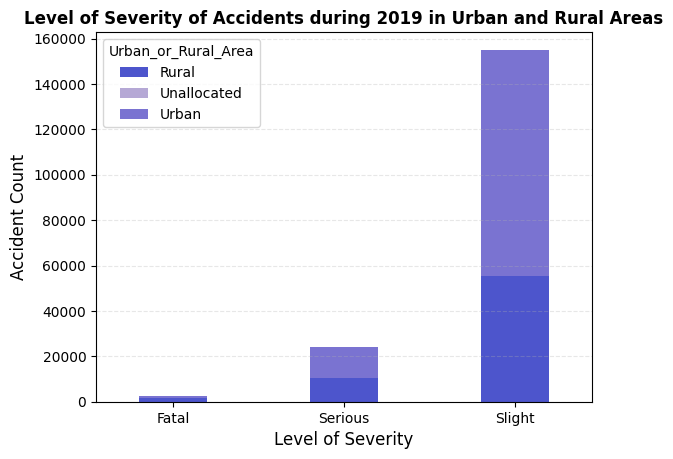

<Figure size 1000x800 with 0 Axes>

In [12]:
#INSIGHTS 3 4 5 6 VISUALIZATION
during2019 = accident[accident['Year']==2019]
severityArea = during2019.groupby(['Accident_Severity','Urban_or_Rural_Area']).size().unstack()
severityArea.plot(kind='bar',stacked=True,color=['#4D55CC','#B5A8D5','#7A73D1'],width=0.4)
plt.title('Level of Severity of Accidents during 2019 in Urban and Rural Areas',weight='bold')
plt.xlabel('Level of Severity',fontsize=12)
plt.ylabel('Accident Count',fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.figure(figsize=(10, 8))
plt.show()

<h3>INSIGHT 3: The majority of slight accidents occur in urban areas (64.2%), highlighting that minor accidents are significantly more frequent in cities compared to rural areas.</h3>
<h3>INSIGHT 4: Serious accidents in rural areas account for 42.4% of all serious incidents, showing that high-impact accidents are not limited to urban environments.</h3>
<h3>INSIGHT 5: Rural areas have a higher fatal accident count than urban areas, with 5,601 fatalities (64.7%), compared to 3,060 fatalities (35.3%) in urban areas.</h3>
<h3>INSIGHT 6: Slight accidents are the most common across all areas, totaling 563,801 incidents, representing 91.1% of all recorded accidents.</h3>

In [13]:
#insights 7, 8, and 9
severity_weather = accident.groupby(['Accident_Severity','Weather_Conditions']).size()
severity_weather.unstack().T

C:\Users\jp\AppData\Local\Temp\ipykernel_1960\436029535.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severity_weather = accident.groupby(['Accident_Severity','Weather_Conditions']).size()


Accident_Severity,Fatal,Serious,Slight
Weather_Conditions,,,
Fine + high winds,175,1245,7134
Fine no high winds,7100,72046,441739
Fog or mist,82,483,2963
Other,165,1801,15184
Raining + high winds,145,1261,8209
Raining no high winds,848,9468,69380
Snowing + high winds,3,109,773
Snowing no high winds,36,565,5637
Unaccouted,107,1239,12782


C:\Users\jp\AppData\Local\Temp\ipykernel_1960\3172114590.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fatal = accident[accident['Accident_Severity'] == 'Fatal'].groupby('Weather_Conditions').size()
C:\Users\jp\AppData\Local\Temp\ipykernel_1960\3172114590.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  serious = accident[accident['Accident_Severity'] == 'Serious'].groupby('Weather_Conditions').size()
C:\Users\jp\AppData\Local\Temp\ipykernel_1960\3172114590.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False t

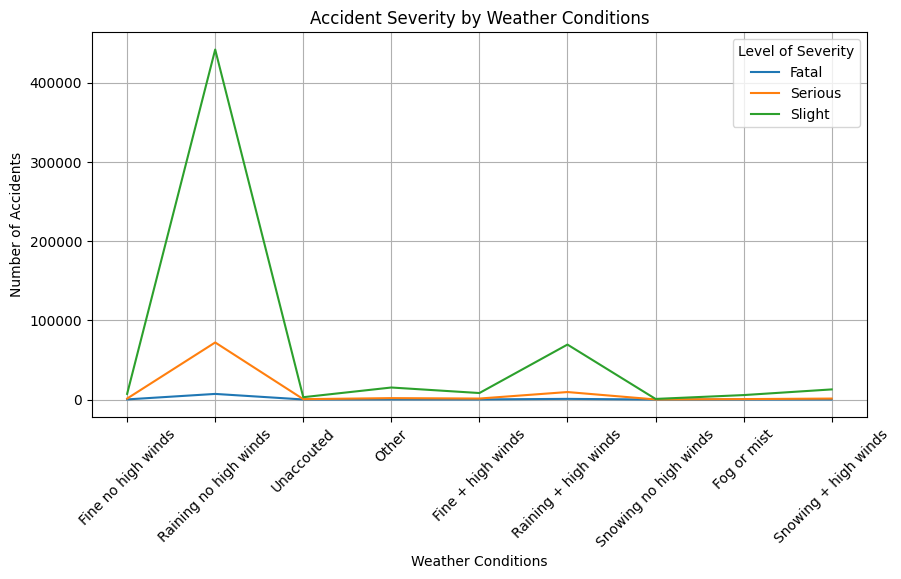

In [14]:
#INSIGHTS 7 8 9 VISUALIZATION
weather_conditions = accident['Weather_Conditions'].unique()

fatal = accident[accident['Accident_Severity'] == 'Fatal'].groupby('Weather_Conditions').size()
serious = accident[accident['Accident_Severity'] == 'Serious'].groupby('Weather_Conditions').size()
slight = accident[accident['Accident_Severity'] == 'Slight'].groupby('Weather_Conditions').size()

plt.figure(figsize=(10, 5))

plt.plot(weather_conditions, fatal, label="Fatal")
plt.plot(weather_conditions, serious, label="Serious")
plt.plot(weather_conditions, slight, label="Slight")

plt.xlabel("Weather Conditions")
plt.ylabel("Number of Accidents")
plt.title("Accident Severity by Weather Conditions")
plt.xticks(rotation=45)
plt.legend(title='Level of Severity')
plt.grid(True)

plt.show()


<h3>INSIGHT 7: Serious accidents are most common in fine weather (no high winds), with 72,046 incidents, accounting for 72.9% of all serious accidents recorded.</h3>
<h3>INSIGHT 8: Fatal accidents are significantly higher in fine weather with no high winds, contributing to 7,100 deaths (84.7% of all fatalities), showing that good weather does not always mean safer conditions.</h3>
<h3>INSIGHT 9: Fog or mist contributes to only 0.56% of total accidents, but remains hazardous due to reduced visibility.</h3>

In [15]:
#insights 10, 11, 12, 13, 14, 15, 16, 17, and 18
road_casualties = accident.groupby(['Vehicle_Type','Road_Type'])['Number_of_Casualties'].size()
road_casualties.unstack()

C:\Users\jp\AppData\Local\Temp\ipykernel_1960\810622557.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  road_casualties = accident.groupby(['Vehicle_Type','Road_Type'])['Number_of_Casualties'].size()


Road_Type,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road,Unaccounted
Vehicle_Type,,,,,,
Agricultural vehicle,293,49,129,1436,27,13
Bus or coach (17 or more pass seats),4043,546,1704,19090,285,210
Car,74820,10223,33187,371028,5298,3436
Data missing or out of range,1,0,0,5,0,0
Goods 7.5 tonnes mgw and over,2631,341,1110,12915,188,122
Goods over 3.5t. and under 7.5t,959,116,422,4498,58,43
Minibus (8 - 16 passenger seats),275,40,138,1493,16,14
Motorcycle 125cc and under,2228,307,991,11507,147,89
Motorcycle 50cc and under,1085,133,512,5743,89,41


C:\Users\jp\AppData\Local\Temp\ipykernel_1960\1879792797.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  roadCasualties = accident.groupby(['Vehicle_Type','Road_Type'])['Number_of_Casualties'].size().unstack()


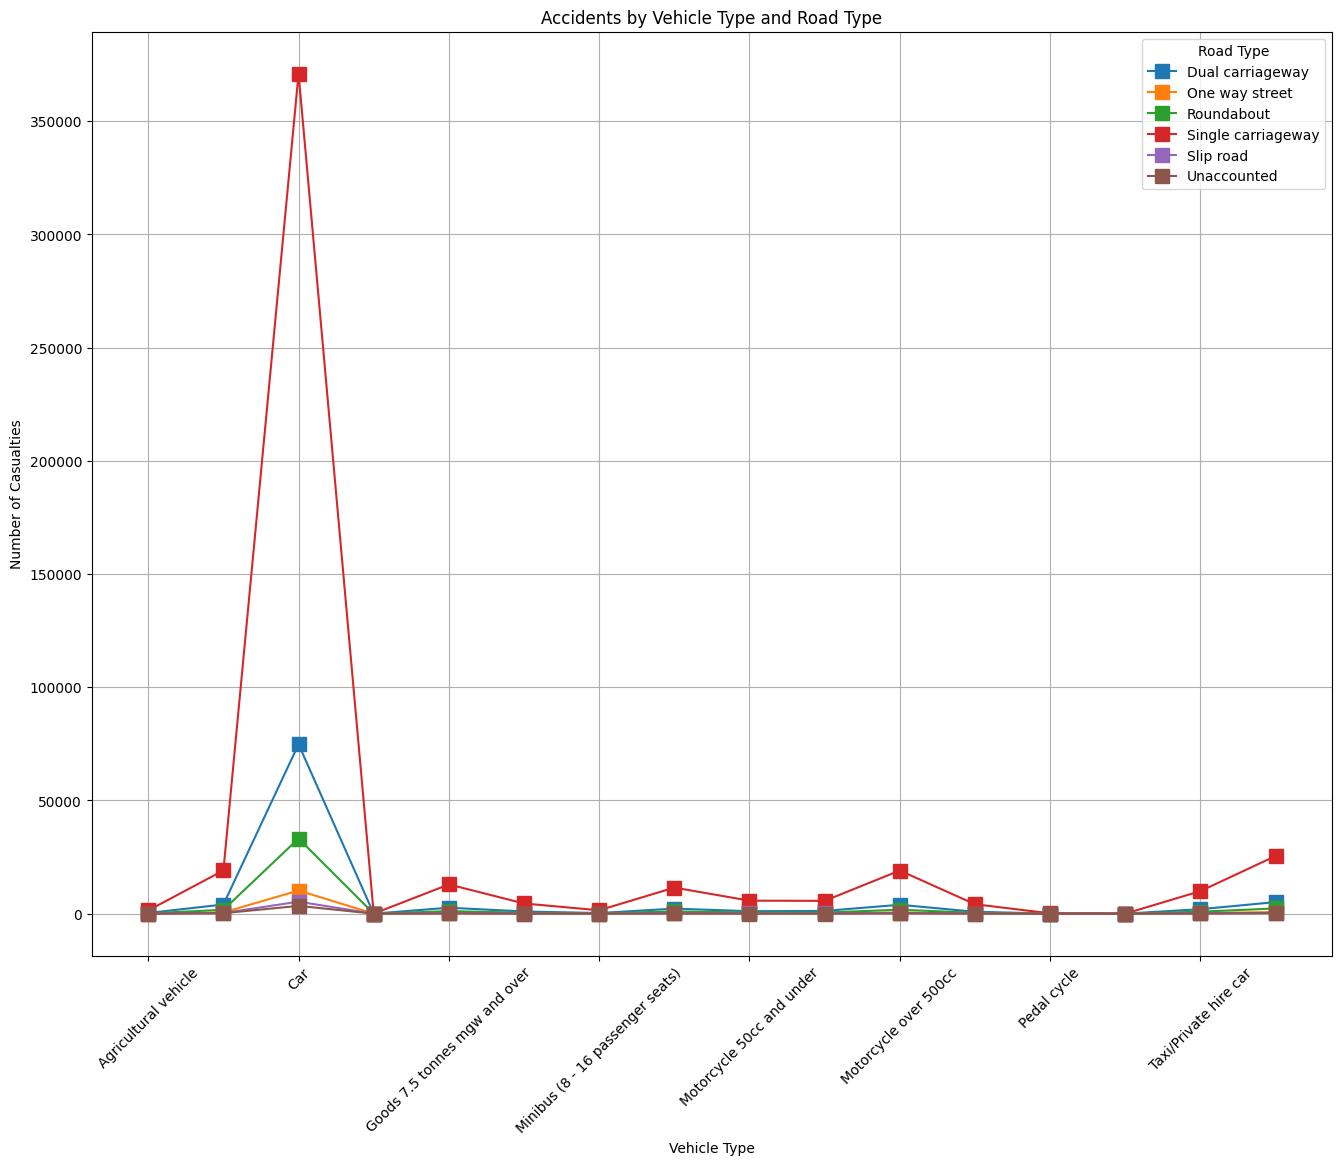

In [16]:
# INSIGHTS 10, 11, 12, 13, 14, 15, 16, 17, and 18 VISUALIZATION
roadCasualties = accident.groupby(['Vehicle_Type','Road_Type'])['Number_of_Casualties'].size().unstack()
roadCasualties.plot(kind='line',marker='s',figsize=(16,12),ms=10)
plt.title("Accidents by Vehicle Type and Road Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Casualties")
plt.xticks(rotation=45)
plt.legend(title="Road Type")
plt.grid(True)

plt.show()

<h3>INSIGHT 10: Single carriageways are the most hazardous road type, accounting for 492,141 casualties, which represents 74.49% of all incidents.
<h3>INSIGHT 11: Dual carriageways rank second in casualties, with 99,424 recorded incidents, making up 15.05% of total cases.
<h3>INSIGHT 12: Cars experience the highest number of casualties, with 497,992 recorded incidents, making up the majority of all vehicle-related casualties.
<h3>INSIGHT 13: Pedal cycles have the lowest casualty rate, with only 195 recorded incidents, representing a tiny fraction (0.03%) of total casualties.
<h3>INSIGHT 14: Motorcycles over 500cc face extreme risks on single carriageways, where 19,050 out of their total incidents occurred—74.25% of all motorcycle 500cc+ casualties.
<h3>INSIGHT 15: Roundabouts pose a significant risk to motorcycles over 500cc, with 1,737 casualties recorded at these locations.
<h3>INSIGHT 16: Slip roads are the safest road type, accounting for just 7,032 total casualties, which is only 1.06% of all incidents.
<h3>INSIGHT 17: Buses and coaches (17+ seats) are most at risk on single carriageways, where 19,090 out of their 25,884 total incidents occurred—73.77% of all bus and coach casualties.
<h3>INSIGHT 18: Agricultural vehicles experience most of their casualties on single carriageways, with 1,436 out of 1,947 total incidents happening there—73.75% of all agricultural vehicle casualties.



In [17]:
#insights 19 and 20
road_light_casualties = accident.groupby(['Light_Conditions','Road_Surface_Conditions'])['Number_of_Casualties'].size()
road_light_casualties.unstack()

C:\Users\jp\AppData\Local\Temp\ipykernel_1960\4211279515.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  road_light_casualties = accident.groupby(['Light_Conditions','Road_Surface_Conditions'])['Number_of_Casualties'].size()


Road_Surface_Conditions,Dry,Flood over 3cm. deep,Frost or ice,Snow,Unaccounted,Wet or damp
Light_Conditions,,,,,,
Darkness - lighting unknown,4396,15,249,105,44,1675
Darkness - lights lit,70368,160,4621,1587,136,52463
Darkness - lights unlit,1353,4,130,26,3,1027
Darkness - no lighting,15619,265,3345,757,27,17424
Daylight,356085,573,10172,3415,516,114119


C:\Users\jp\AppData\Local\Temp\ipykernel_1960\3236474454.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rlc = accident.groupby(['Light_Conditions','Road_Surface_Conditions'])['Number_of_Casualties'].size().unstack()


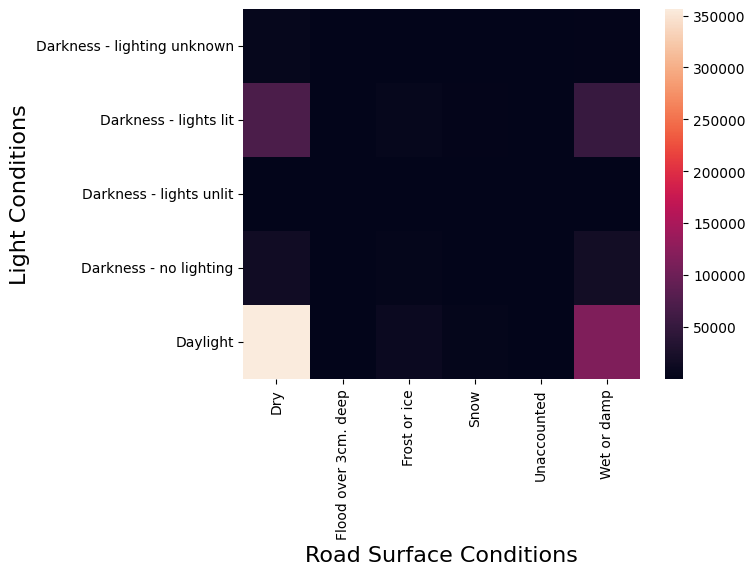

In [18]:
# INSIGHTS 19 20 VISUALIZATION
rlc = accident.groupby(['Light_Conditions','Road_Surface_Conditions'])['Number_of_Casualties'].size().unstack()
sns.heatmap(rlc)
plt.ylabel('Light Conditions',fontsize=16)
plt.xlabel('Road Surface Conditions',fontsize=16)
plt.show()

<h3>INSIGHT 19: Daylight poses the highest risk for casualties, accounting for over 73% of incidents, despite the advantage of clear visibility.</h3>
<h3>INSIGHT 20: Hazardous road conditions like ice and snow contribute to a significant number of casualties (24,407 cases), proving that adequate lighting alone is not enough to prevent accidents in such conditions.</h3>